In [1]:
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="localhost", database = 'plotingdb',user="root", passwd="",use_pure=True)
    query = "select * from ranges;"
    result_dataFrame = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

C:\Users\lalo_\.virtualenvs\ploting\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [2]:
result_dataFrame.head()

,id,status,society,min_limit,max_limit,next_number,snapshot_date
0,1,active,zzz,500,1000,501,2022-07-01
1,2,active,zzz,500,1000,502,2022-07-02
2,3,active,zzz,500,1000,515,2022-07-03
3,4,active,zzz,500,1000,520,2022-07-04
4,5,active,aaa,500,1000,505,2022-07-01


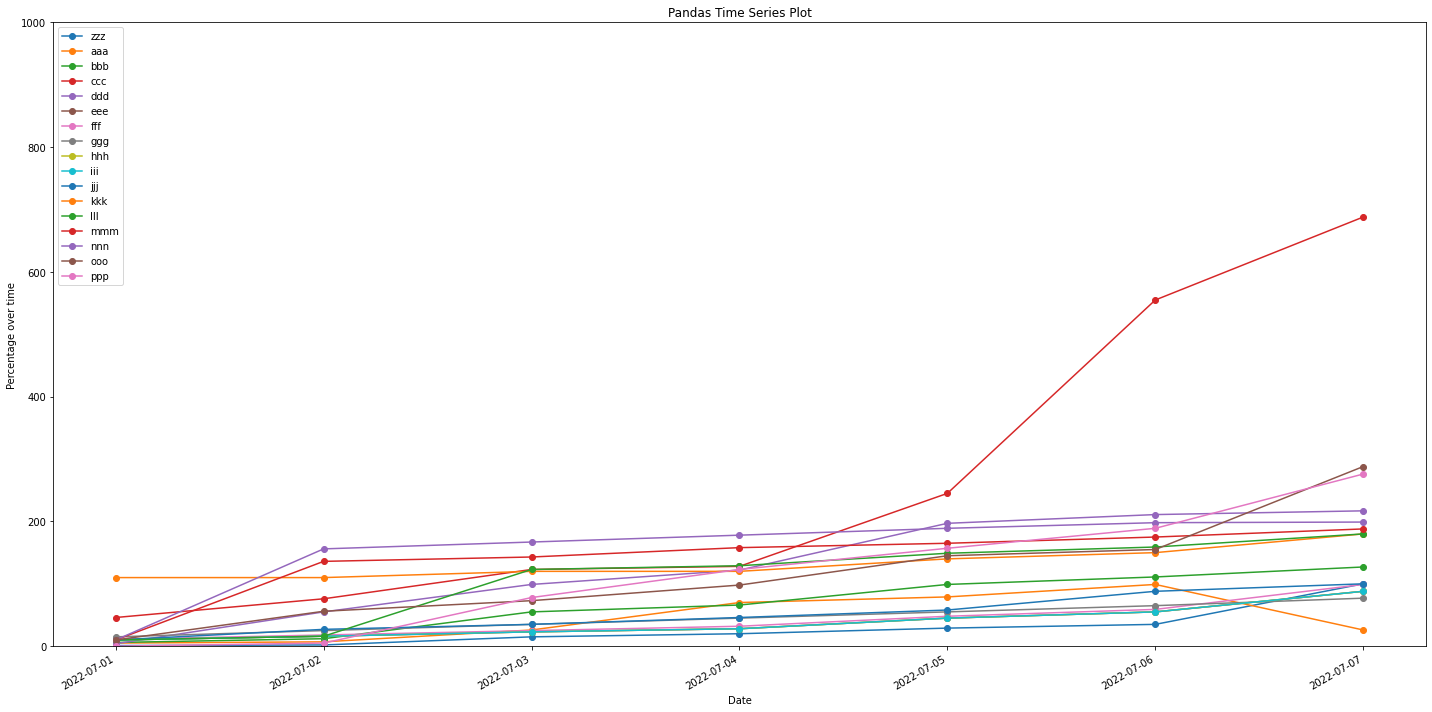

In [14]:
#///////////////////////////////// PLOT RANGES OVER TIME \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np

_enable_print = False

@dataclass
class PlotData(object):
   society : str
   date_ranges : np.array([])
   next_numbers : []

time_series_data = {'dates':np.array([])}
# TODO
#
#  en cada iteracion agregar al mapa correrto de la sociedad y los datos (fecha-cantidad)
# agregar un rango donde el total sea siempre el limite suoperior
# restar el minimo a todas las cantidades
# graficar al final de todas las iteraciones

for row in result_dataFrame.itertuples():
    if _enable_print:
        print(row)
    if not row.society in time_series_data:
        time_series_data[row.society] = np.array([row.next_number-row.min_limit])
        time_series_data['dates'] = np.append(time_series_data['dates'], [datetime.combine(row.snapshot_date, datetime.min.time())])
    else:
        time_series_data[row.society] = np.append(time_series_data[row.society], [row.next_number-row.min_limit])
        time_series_data['dates'] = np.append(time_series_data['dates'], [datetime.combine(row.snapshot_date, datetime.min.time())])

# Remove duplicates
time_series_data['dates'] = list(dict.fromkeys(time_series_data['dates']))
if _enable_print:
    print(time_series_data)



# Plot
plt.figure(figsize=(20.0, 10.0))
dates = time_series_data["dates"]
for key,value in time_series_data.items():
    if key != 'dates':# ignore 'dates' key data
        plt.plot(dates,value,marker='o', label=key)
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
# Labelling
plt.xlabel("Date")
plt.ylabel("Percentage over time")
plt.title("Pandas Time Series Plot")
# Y axes limit
plt.ylim((0,1000))
plt.xticks(rotation=30, ha='right')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

Text(0, 0.5, 'Classes')

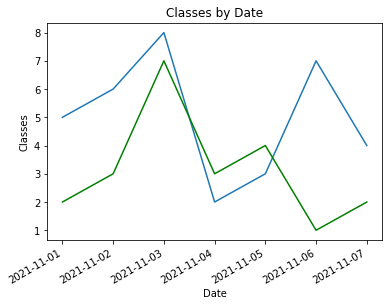

In [5]:
#/////////////////////////REFERENCE EXAMPLE\\\\\\\\\\\\\\\\\\\\\\\\\\\
# Initialising required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# ABC colllege classes by date- from 01-11-2021 to 07-11-2021
abc = pd.DataFrame({'date_of_week': np.array([datetime.datetime(2021, 11, i+1)
                                              for i in item(7)]),
                    'classes': [5, 6, 8, 2, 3, 7, 4]})


# XYZ colllege classes by date - from 01-11-2021 to 07-11-2021
xyz = pd.DataFrame({'date_of_week': np.array([datetime.datetime(2021, 11, i+1)
                                              for i in item(7)]),
                    'classes': [2, 3, 7, 3, 4, 1, 2]})

# plotting the time series of ABC college dataframe
plt.plot(abc.date_of_week, abc.classes)

# plotting the time series of XYZ college dataframe
plt.plot(xyz.date_of_week, xyz.classes, color='green')

# Giving title to the graph
plt.title('Classes by Date')

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

# Giving x and y label to the graph
plt.xlabel('Date')
plt.ylabel('Classes')